In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import plotly.express as px
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

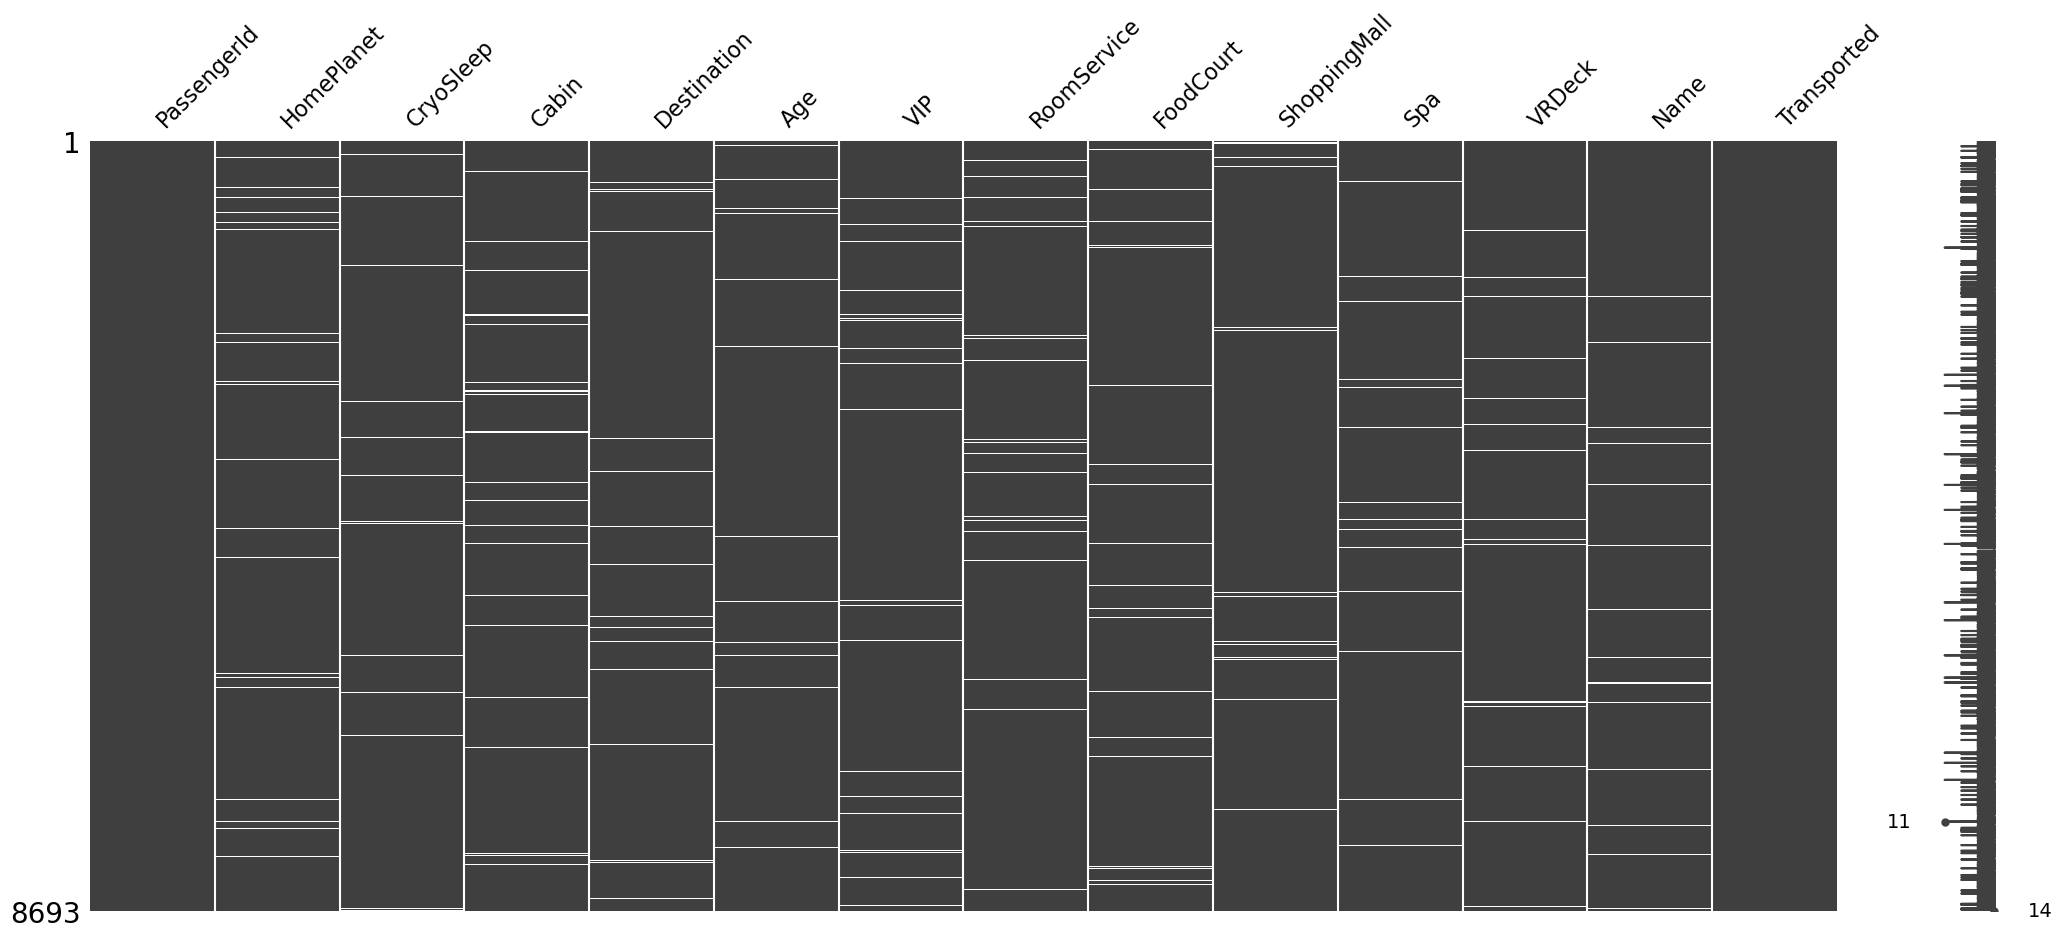

In [6]:
msno.matrix(df)
plt.show()

In [7]:
test = pd.read_csv('test.csv')

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [9]:
test.nunique()

PassengerId     4277
HomePlanet         3
CryoSleep          2
Cabin           3265
Destination        3
Age               79
VIP                2
RoomService      842
FoodCourt        902
ShoppingMall     715
Spa              833
VRDeck           796
Name            4176
dtype: int64

In [10]:
passid= test['PassengerId']

In [11]:
train = pd.concat([df, test])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [13]:
train[train.duplicated()]

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported]
Index: []

In [14]:
train.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

  Transported  
0       False  
1        True  
2       False  
3       False  
4        True

In [15]:
train.index[train.index.duplicated()]

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4276],
      dtype='int64', length=4277)

In [16]:
train.reset_index(drop=True, inplace=True)

In [17]:
train.isnull().sum()[(train.isnull().sum()>0)]

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

### EDA

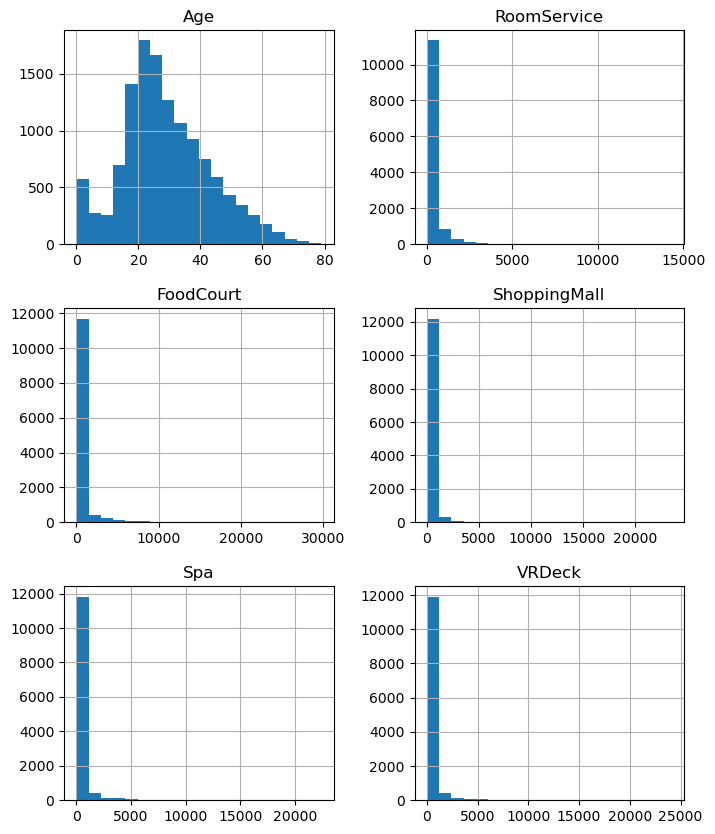

In [18]:
train.hist(bins=20, figsize=(8,10)) #plot numberic chart
plt.show()

In [19]:
# I used plotly because it generate faster than Matplotlib
cat_cols = train.select_dtypes(include=['object']).columns


for col in cat_cols:

    value_counts = train[col].value_counts().reset_index()
    value_counts.columns = [col, 'count']
    fig = px.bar(value_counts, x=col, y='count', title=f'Distribution of {col}', width=500, height=300)
    fig.show()



### Data Cleaning

<Figure size 500x300 with 0 Axes>

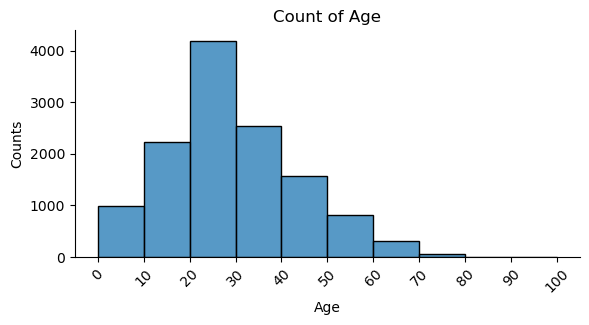

In [20]:
plt.figure(figsize=(5,3))
sns.displot(data=train, x="Age",bins=[0,10,20,30,40,50,60,70,80,90,100],height=3, aspect=2)
plt.title('Count of Age')
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],rotation=45)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

In [21]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

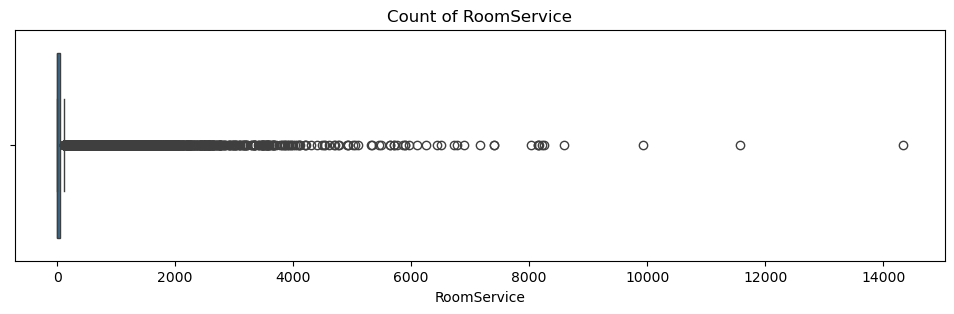

In [22]:
plt.figure(figsize=(12,3))
sns.boxplot(data=train, x="RoomService")
plt.title('Count of RoomService')
plt.show()

In [23]:
train['RoomService'] = train['RoomService'].fillna(train['RoomService'].mode().iloc[0])

In [24]:
train['VRDeck'] = train['VRDeck'].fillna(train['VRDeck'].mode().iloc[0])
train['ShoppingMall'] = train['ShoppingMall'].fillna(train['ShoppingMall'].mode().iloc[0])
train['Spa'] = train['Spa'].fillna(train['Spa'].mode().iloc[0])
train['FoodCourt'] = train['FoodCourt'].fillna(train['FoodCourt'].mode().iloc[0])

In [25]:
exp_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train["Expenditure"]=train[exp_features].sum(axis="columns")

In [26]:
train.groupby(['Expenditure', 'CryoSleep'])['CryoSleep'].size()

Expenditure  CryoSleep
0.0          False         740
             True         4581
1.0          False           3
2.0          False           1
4.0          False           1
                          ... 
31811.0      False           1
31812.0      False           1
33389.0      False           1
33666.0      False           1
35987.0      False           1
Name: CryoSleep, Length: 2941, dtype: int64

In [27]:
train['CryoSleep']=np.where(train['Expenditure']==0,1,0) #where the value is 1 if Expenditure is 0 and 0 otherwise.

In [28]:
train.drop(['Expenditure'], axis=1, inplace=True)

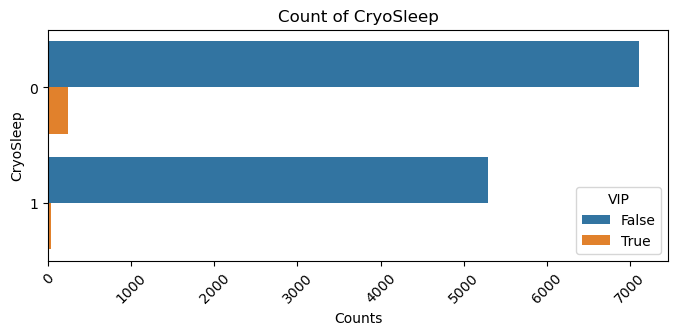

In [29]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, y='CryoSleep', hue= 'VIP')
plt.title('Count of CryoSleep')
plt.xticks(rotation=45)
plt.ylabel('CryoSleep')
plt.xlabel('Counts')
plt.show() # most VIP will not stay in CryoSleep

In [30]:
train['VIP']=np.where(train['CryoSleep']==0,1,0)

In [31]:
train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')

In [32]:
train.isnull().sum()

PassengerId        0
HomePlanet       288
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
dtype: int64

### Cabin

In [33]:
train['Cabin_Deck']= train['Cabin'].str[0] 
train['Cabin_Side']= train['Cabin'].str[-1]

In [34]:
train['Cabin_Deck'].unique()

array(['B', 'F', 'A', 'G', nan, 'E', 'D', 'C', 'T'], dtype=object)

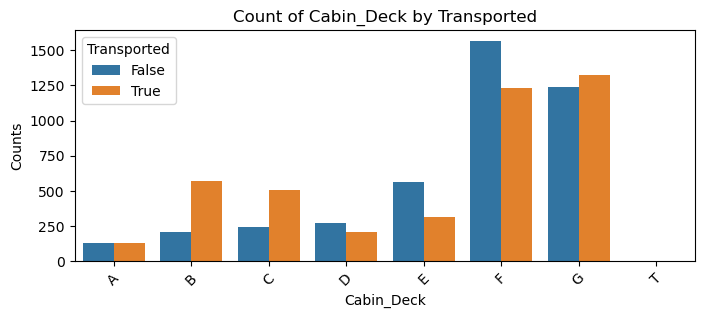

In [35]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='Cabin_Deck', hue= 'Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Count of Cabin_Deck by Transported')
plt.xticks(rotation=45)
plt.xlabel('Cabin_Deck')
plt.ylabel('Counts')
plt.show()

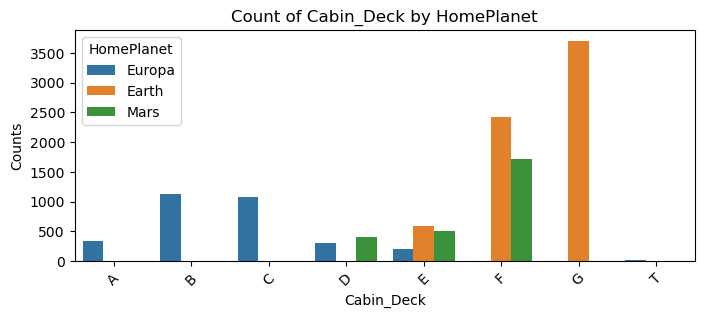

In [36]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='Cabin_Deck', hue= 'HomePlanet', order=['A','B','C','D','E','F','G','T'])
plt.title('Count of Cabin_Deck by HomePlanet')
plt.xticks(rotation=45)
plt.xlabel('Cabin_Deck')
plt.ylabel('Counts')
plt.show()

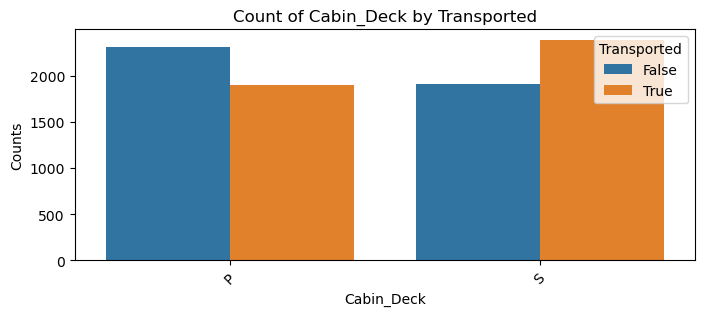

In [37]:
plt.figure(figsize=(8,3))
sns.countplot(data=train, x='Cabin_Side', hue= 'Transported')
plt.title('Count of Cabin_Deck by Transported')
plt.xticks(rotation=45)
plt.xlabel('Cabin_Deck')
plt.ylabel('Counts')
plt.show() # S more transport than P

### Home Planet

In [38]:
### Deck A, B, C from Europa. Deck G from Earth

train['HomePlanet'] = np.where((train['Cabin_Deck'] == 'G') & (train['HomePlanet'].isna()), 'Earth', train['HomePlanet'])
train['HomePlanet'] = np.where((train['Cabin_Deck'].isin(['A', 'B', 'C'])) & (train['HomePlanet'].isna()), 
                               'Europa', train['HomePlanet'])

In [39]:
train['Surname']= train['Name'].str.split().str[-1]

In [40]:
surHome= train.groupby(['Surname','HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

In [41]:
# finding the rows with missing 'HomePlanet' values that have a matching 'Surname' in the surname DataFrame.
SurHome_index= train[train['HomePlanet'].isna()][(train[train['HomePlanet'].isna()]['Surname']).isin(surHome.index)].index

In [42]:
train.iloc[SurHome_index,:]

PassengerId HomePlanet  CryoSleep     Cabin    Destination   Age  VIP  \
59        0064_02        NaN          1     E/3/S    TRAPPIST-1e  33.0    0   
186       0210_01        NaN          1     D/6/P    55 Cancri e  24.0    0   
225       0242_01        NaN          0    F/46/S    TRAPPIST-1e  18.0    1   
291       0321_01        NaN          0    F/61/S    TRAPPIST-1e  59.0    1   
365       0402_01        NaN          1    D/15/S    55 Cancri e  32.0    0   
...           ...        ...        ...       ...            ...   ...  ...   
12250     7740_01        NaN          0  F/1610/P  PSO J318.5-22  16.0    1   
12347     7961_01        NaN          0   D/231/S    TRAPPIST-1e  39.0    1   
12542     8417_01        NaN          0  F/1617/S    TRAPPIST-1e  43.0    1   
12650     8621_01        NaN          0   E/552/P    TRAPPIST-1e  19.0    1   
12906     9146_01        NaN          0  F/1874/P    TRAPPIST-1e  52.0    1   

       RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  \
59             0.0        0.0           0.0    0.0     0.0        Colatz Keen   
186            0.0        0.0           0.0    0.0     0.0     Arraid Inicont   
225          313.0        1.0         691.0  283.0     0.0         Almone Sté   
291         1018.0        0.0         209.0    0.0     0.0       Quites Bache   
365            0.0        0.0           0.0    0.0     0.0       Teron Sageng   
...            ...        ...           ...    ...     ...                ...   
12250          0.0        0.0         672.0    0.0     0.0  Viviay Daughessey   
12347       1905.0        0.0         479.0    0.0     0.0       Quants Burle   
12542          0.0        0.0         775.0    0.0    93.0   Luzel Bertsontry   
12650          4.0        0.0        1604.0    0.0     0.0  Vanley Simmonders   
12906        994.0        0.0         173.0    0.0    24.0        Rionk Sache   

      Transported Cabin_Deck Cabin_Side     Surname  
59           True          E          S        Keen  
186          True          D          P     Inicont  
225         False          F          S         Sté  
291         False          F          S       Bache  
365          True          D          S      Sageng  
...           ...        ...        ...         ...  
12250         NaN          F          P  Daughessey  
12347         NaN          D          S       Burle  
12542         NaN          F          S  Bertsontry  
12650         NaN          E          P  Simmonders  
12906         NaN          F          P       Sache  

[148 rows x 17 columns]

In [43]:
# Fill corresponding missing values
train.loc[SurHome_index,'HomePlanet']=train.iloc[SurHome_index,:]['Surname'].map(lambda x: surHome.idxmax(axis=1)[x])

In [44]:
train[train['Surname'] == 'Acobson'] #checking whether is it correct mapping

PassengerId HomePlanet  CryoSleep     Cabin  Destination   Age  VIP  \
3957      4220_01      Earth          0   E/263/P  TRAPPIST-1e  31.0    1   
6540      6905_01      Earth          0  F/1322/S  TRAPPIST-1e  39.0    1   
6541      6905_02      Earth          0   E/460/S  TRAPPIST-1e  15.0    1   
6542      6905_03      Earth          0  F/1322/S  55 Cancri e  16.0    1   
10713     4353_01      Earth          0   F/817/S  TRAPPIST-1e  18.0    1   

       RoomService  FoodCourt  ShoppingMall    Spa  VRDeck            Name  \
3957         553.0      224.0           9.0    1.0     0.0    Tine Acobson   
6540         130.0      741.0           0.0    0.0     0.0    Vana Acobson   
6541           0.0        0.0           0.0  938.0    44.0  Lilasa Acobson   
6542          43.0        3.0         750.0    0.0     0.0  Gaylah Acobson   
10713        736.0       40.0           0.0    0.0     0.0  Naomie Acobson   

      Transported Cabin_Deck Cabin_Side  Surname  
3957        False          E          P  Acobson  
6540        False          F          S  Acobson  
6541        False          E          S  Acobson  
6542         True          F          S  Acobson  
10713         NaN          F          S  Acobson

In [45]:
train.isnull().sum()

PassengerId        0
HomePlanet        13
CryoSleep          0
Cabin            299
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
Transported     4277
Cabin_Deck       299
Cabin_Side       299
Surname          294
dtype: int64

In [46]:
# Fill remaining HomePlanet missing values with Earth (if not on deck D) or Mars (if on Deck D) 
#as Deck D only have Europa and Mars, Mars high possibility
train.loc[(train['HomePlanet'].isna()) & ~(train['Cabin_Deck']=='D'), 'HomePlanet']='Earth'

In [47]:
train.loc[(train['HomePlanet'].isna()) & (train['Cabin_Deck']=='D'), 'HomePlanet']='Mars'

In [48]:
train['Cabin_Deck'] = train['Cabin_Deck'].ffill()
train['Cabin_Side'] = train['Cabin_Side'].ffill()

In [49]:
train= pd.get_dummies(data=train,columns=['Cabin_Deck','Cabin_Side', 'Destination', 'HomePlanet'], drop_first= True)

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PassengerId                12970 non-null  object 
 1   CryoSleep                  12970 non-null  int32  
 2   Cabin                      12671 non-null  object 
 3   Age                        12970 non-null  float64
 4   VIP                        12970 non-null  int32  
 5   RoomService                12970 non-null  float64
 6   FoodCourt                  12970 non-null  float64
 7   ShoppingMall               12970 non-null  float64
 8   Spa                        12970 non-null  float64
 9   VRDeck                     12970 non-null  float64
 10  Name                       12676 non-null  object 
 11  Transported                8693 non-null   object 
 12  Surname                    12676 non-null  object 
 13  Cabin_Deck_B               12970 non-null  boo

In [51]:
train.isnull().sum()

PassengerId                     0
CryoSleep                       0
Cabin                         299
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Name                          294
Transported                  4277
Surname                       294
Cabin_Deck_B                    0
Cabin_Deck_C                    0
Cabin_Deck_D                    0
Cabin_Deck_E                    0
Cabin_Deck_F                    0
Cabin_Deck_G                    0
Cabin_Deck_T                    0
Cabin_Side_S                    0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
HomePlanet_Europa               0
HomePlanet_Mars                 0
dtype: int64

In [52]:
train.drop({'Cabin','PassengerId','Name','Surname'},axis=1, inplace=True)

In [53]:
train['VIP']= train['VIP'].astype(bool)
train['CryoSleep']= train['CryoSleep'].astype(bool)

In [54]:
train.isnull().sum()

CryoSleep                       0
Age                             0
VIP                             0
RoomService                     0
FoodCourt                       0
ShoppingMall                    0
Spa                             0
VRDeck                          0
Transported                  4277
Cabin_Deck_B                    0
Cabin_Deck_C                    0
Cabin_Deck_D                    0
Cabin_Deck_E                    0
Cabin_Deck_F                    0
Cabin_Deck_G                    0
Cabin_Deck_T                    0
Cabin_Side_S                    0
Destination_PSO J318.5-22       0
Destination_TRAPPIST-1e         0
HomePlanet_Europa               0
HomePlanet_Mars                 0
dtype: int64

In [55]:
test = train[train['Transported'].isna()]

In [56]:
test= test.drop('Transported', axis=1)

In [57]:
test.shape

(4277, 20)

In [58]:
train = train.dropna(subset=['Transported'])

In [59]:
train['Transported']= train['Transported'].astype(bool)

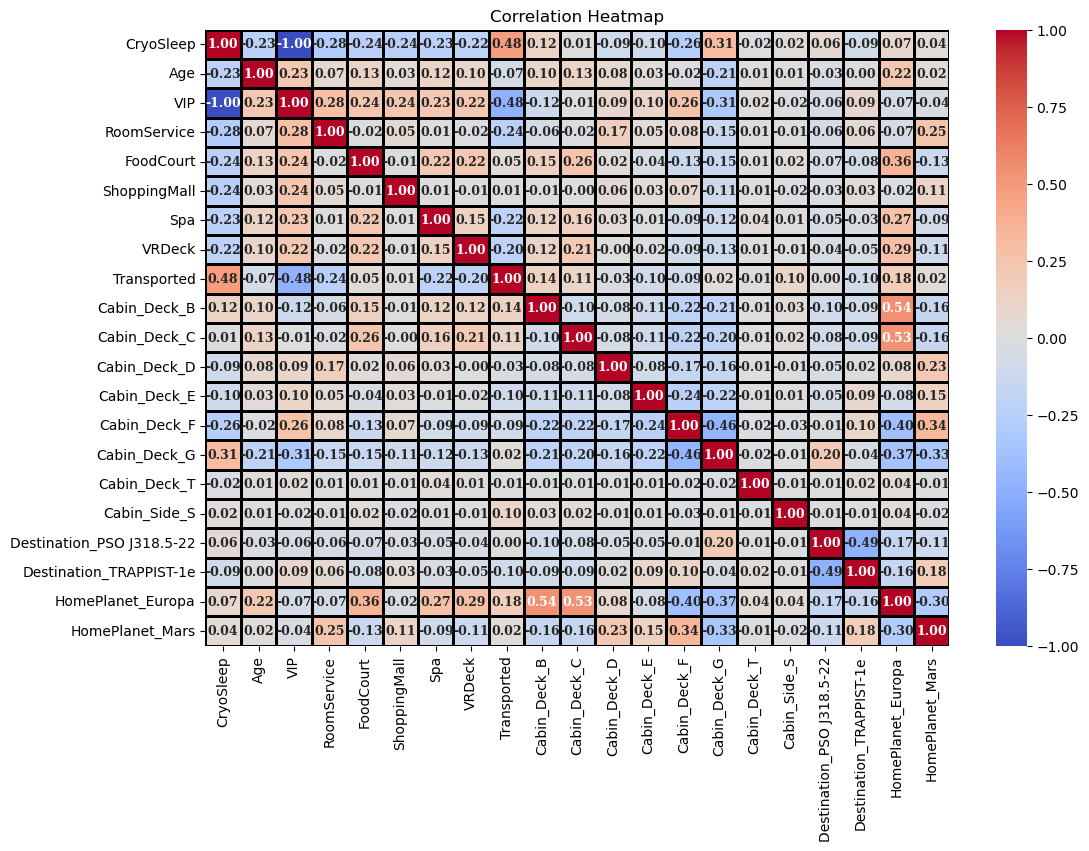

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True,
            fmt='0.2f',annot_kws={"fontsize":9,"fontweight":"bold","fontfamily":"serif"},linewidth=1,linecolor="black")
plt.xticks(rotation=90)
plt.title('Correlation Heatmap')
plt.show()

### Model development

In [61]:
y = train['Transported']
X= train.drop('Transported', axis=1)

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=14)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
ann_grid = MLPClassifier(
    hidden_layer_sizes= (48,2),
    alpha= 1.0,
    solver= 'adam',
    random_state= 14                   
                        )
dt_grid = DecisionTreeClassifier(random_state=14)
svc_grid = SVC(C=1, probability=True, random_state=14)
rf_grid = RandomForestClassifier(n_estimators= 100, random_state=14)

models = {
    'ann': ann_grid,
    'dt': dt_grid,
    'svc': svc_grid,
    'rf': rf_grid
}

# Define evaluation function using cross-validation
def evaluate_cv(model, X, y):
    kf = KFold(5, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X, y, scoring='accuracy', cv=kf)
    return cv_score.mean()

# Define function to evaluate model on test set
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(y_test, prediction)
    return accuracy

# Evaluate each model using cross-validation and on the test set
results = []
for name, model in models.items():
    cv_score = evaluate_cv(model, X_train, y_train)
    test_accuracy = evaluate_model(model, X_train, y_train, X_test, y_test)
    results.append({
        'Model': name,
        'CV Accuracy': cv_score,
        'Test Accuracy': test_accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)


  Model  CV Accuracy  Test Accuracy
0   ann     0.799395       0.801610
1    dt     0.738281       0.736055
2   svc     0.795083       0.784934
3    rf     0.789185       0.786659


In [65]:
voting_clf = VotingClassifier(estimators=[
    ('ann', ann_grid),
    ('svc', svc_grid),
    ('rf', rf_grid)
], voting='soft') 
#Hard Voting: The class with the most votes wins.
#Soft Voting: The class with the highest average probability wins.
    
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [66]:
#Once you are confident about the model's performance, train the model on the entire dataset (without any split) 
#to leverage all the available data. This step is for making predictions on new data that the model has never seen before.
voting_clf.fit(X, y)

VotingClassifier(estimators=[('ann',
                              MLPClassifier(alpha=1.0,
                                            hidden_layer_sizes=(48, 2),
                                            random_state=14)),
                             ('svc',
                              SVC(C=1, probability=True, random_state=14)),
                             ('rf', RandomForestClassifier(random_state=14))],
                 voting='soft')

In [67]:
test_col = test[X.columns]

In [68]:
pred_clf = voting_clf.predict(test_col)

### Result

In [69]:
result = pd.DataFrame({'PassengerId': passid, 'Transported': pred_clf})

In [70]:
result.groupby('Transported').size()

Transported
False    2039
True     2238
dtype: int64

In [71]:
result.to_csv('submission.csv', index=False)